# Oversamplaing and Undersampling Techniques
## Explaining techniques to handle imbalanced Dataset

In [29]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
os.chdir('/Users/subham/Desktop/SMOTE')

In [30]:
%matplotlib inline
np.random.seed(27)
rcParams['figure.figsize'] = 10, 6
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

In [31]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [32]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [33]:
df = pd.read_csv('data.csv')

In [34]:
df.tail()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [35]:
X = df.loc[:, df.columns!='Class']

In [36]:
Y = df.loc[:, df.columns=='Class']

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.33,random_state=42)

0    284315
1       492
Name: Class, dtype: int64


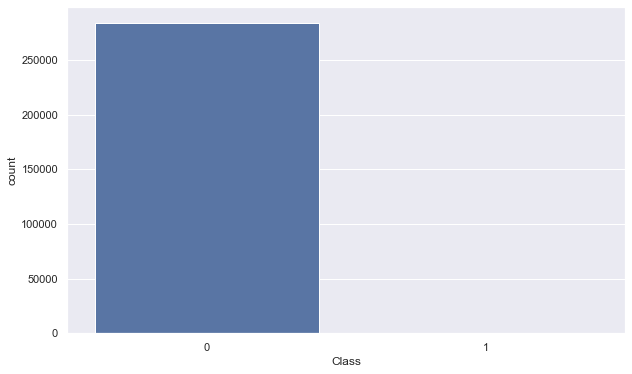

In [38]:
ax = sns.countplot(x=df['Class'], data=df)
print(df['Class'].value_counts())

## Observation : 
- Imbalanced Dataset

In [39]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(190820, 30) (190820, 1)
(93987, 30) (93987, 1)


## Let's check imbalance in the train labels too

0    190477
1       343
Name: Class, dtype: int64


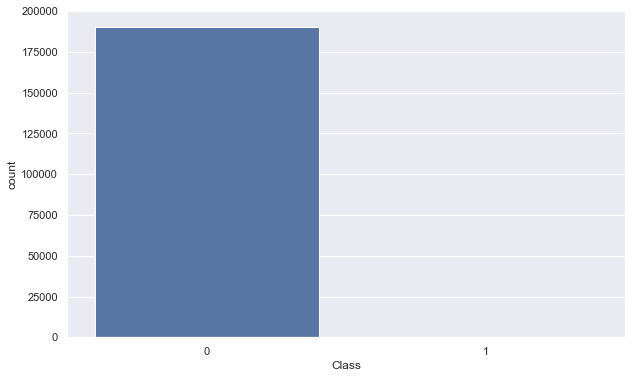

In [40]:
ax = sns.countplot(x=Y_train['Class'], data=Y_train)
print(Y_train['Class'].value_counts())

## Let's  train a model

In [41]:
clf = LogisticRegression().fit(X_train, Y_train)

In [42]:
Y_Test_Pred = clf.predict(X_test)

In [43]:
pd.crosstab(Y_Test_Pred, Y_test['Class'], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,93792,47
1,46,102


In [44]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9990105014523285
Precision =  0.6891891891891891
Recall =  0.6845637583892618
F1 Score =  0.6868686868686869


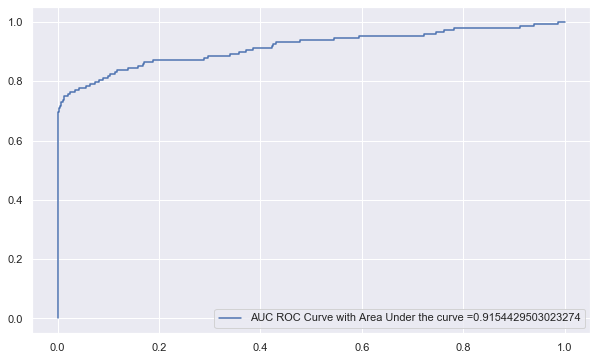

In [22]:
generate_auc_roc_curve(clf, X_test)

## Results are not bad at all.


## Performing some tuning of class weights

In [45]:
weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=5
)

grid_result = gsc.fit(X_train, Y_train)
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'class_weight': {0: 0.4289473684210526, 1: 0.5710526315789475}}


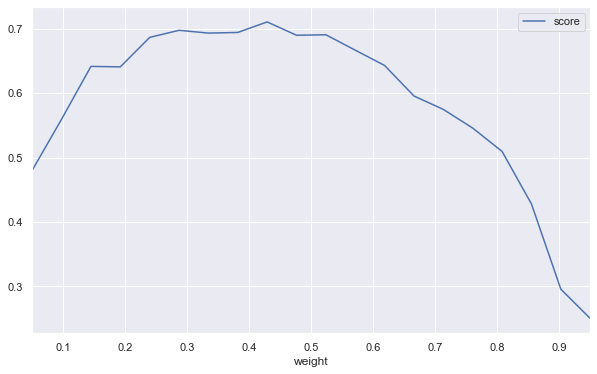

In [48]:
data_out = pd.DataFrame({'score': grid_result.cv_results_['mean_test_score'],'weight': weights })
data_out.plot(x='weight')

In [49]:
clf = LogisticRegression(**grid_result.best_params_).fit(X_train, Y_train)
Y_Test_Pred = clf.predict(X_test)

In [51]:
pd.crosstab(Y_Test_Pred, Y_test['Class'], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,93802,59
1,36,90


In [52]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9989892219136689
Precision =  0.7142857142857143
Recall =  0.6040268456375839
F1 Score =  0.6545454545454547


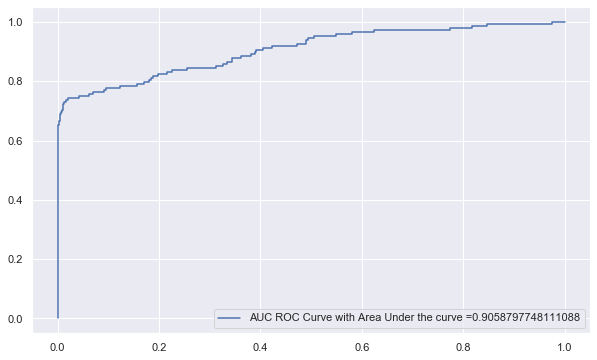

In [53]:
generate_auc_roc_curve(clf, X_test)

## Let's try using class_weight='balanced'
- wj = n/k*nj , where wj is weight to class j, n is the number of observations, nj is the number of observations in class j, k is the total number of classes. 


In [54]:
clf = LogisticRegression(class_weight='balanced').fit(X_train, Y_train)
Y_Test_Pred = clf.predict(X_test)


In [55]:
pd.crosstab(Y_Test_Pred, Y_test['Class'], rownames=['Predicted'], colnames=['Actual'])


Actual,0,1
Predicted,,
0,90726,12
1,3112,137


In [56]:
generate_model_report(Y_test, Y_Test_Pred)


Accuracy =  0.9667613606137019
Precision =  0.04216682056017236
Recall =  0.9194630872483222
F1 Score =  0.08063566804002353


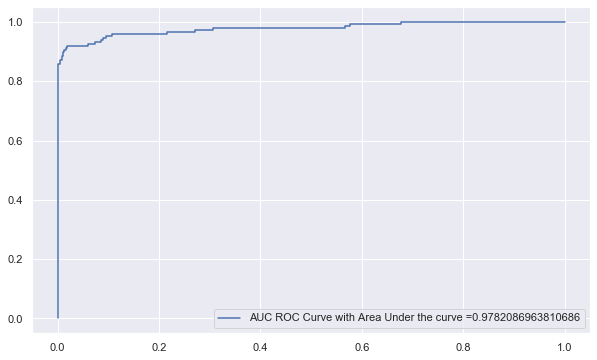

In [57]:
generate_auc_roc_curve(clf, X_test)


## F1 score has dropped drastically since precision has dropped 

## Let's try the SMOTE technique

0    190477
1       343
Name: Class, dtype: int64


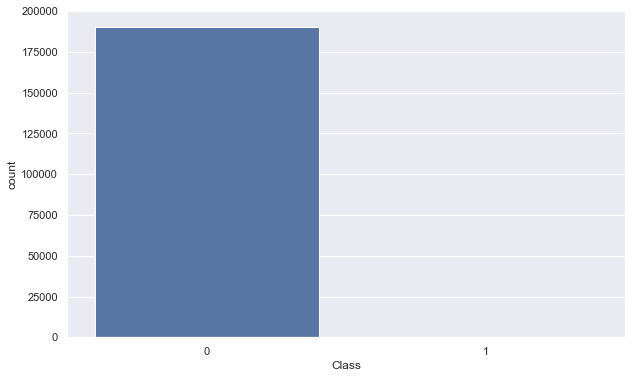

In [58]:
ax = sns.countplot(x=Y_train['Class'], data=Y_train)
print(Y_train['Class'].value_counts())

In [60]:
sm = SMOTE(random_state=12, sampling_strategy='auto')
x_train_res, y_train_res = sm.fit_sample(X_train, Y_train)

1    190477
0    190477
Name: Class, dtype: int64


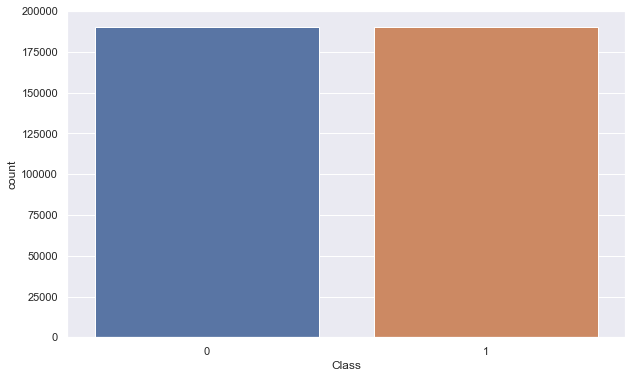

In [61]:
ax = sns.countplot(x=y_train_res['Class'], data=y_train_res)
print(y_train_res['Class'].value_counts())

In [62]:
clf = LogisticRegression().fit(x_train_res, y_train_res)


In [63]:
Y_Test_Pred = clf.predict(X_test)

In [65]:
pd.crosstab(Y_Test_Pred, Y_test['Class'], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,92202,15
1,1636,134


In [66]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9824337408364987
Precision =  0.07570621468926554
Recall =  0.8993288590604027
F1 Score =  0.13965607087024492


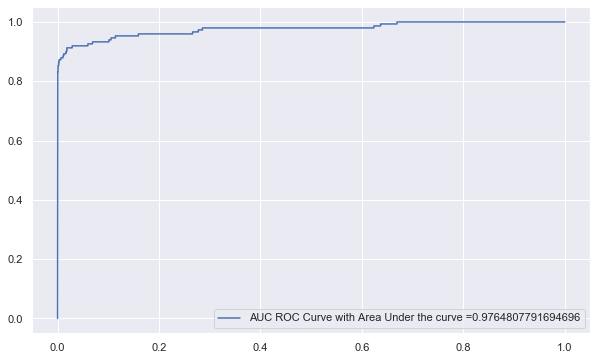

In [67]:
generate_auc_roc_curve(clf, X_test)

## The F1 Score is very low. 

Best parameters : {'smote__sampling_strategy': 0.005}


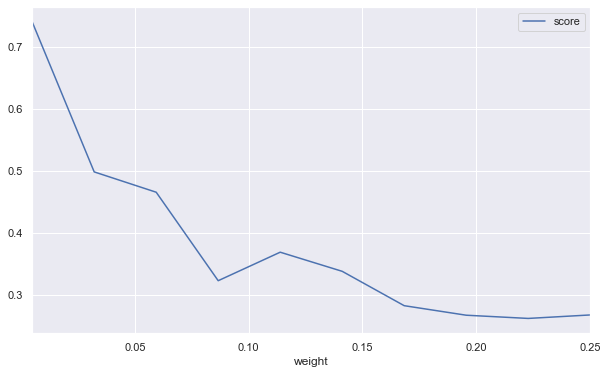

In [97]:
pipe = make_pipeline(
    SMOTE(),
    LogisticRegression()
)

weights = np.linspace(0.005, 0.25, 10)

gsc = GridSearchCV(
    estimator=pipe,
    param_grid={
        'smote__sampling_strategy': weights
    },
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(X_train, Y_train)

print("Best parameters : %s" % grid_result.best_params_)
weight_f1_score_df = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                                   'weight': weights })
weight_f1_score_df.plot(x='weight')

In [98]:
pipe = make_pipeline(
    SMOTE(sampling_strategy=0.005),
    LogisticRegression()
)

pipe.fit(X_train, Y_train)

Y_Test_Pred = pipe.predict(X_test)

In [99]:
pd.crosstab(Y_Test_Pred, Y_test['Class'], 
            rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,93761,37
1,77,112


In [100]:
generate_model_report(Y_test, Y_Test_Pred)


Accuracy =  0.9987870662964027
Precision =  0.5925925925925926
Recall =  0.7516778523489933
F1 Score =  0.6627218934911243


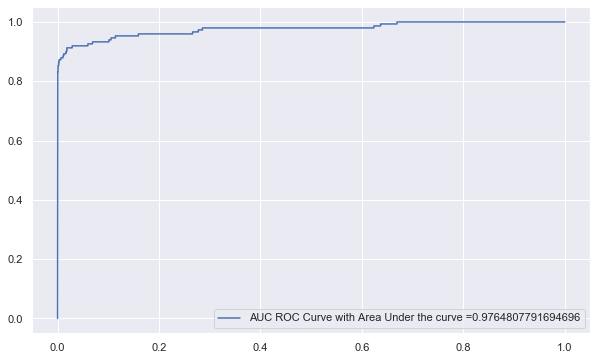

In [96]:
generate_auc_roc_curve(clf, X_test)


## UNDERSAMPLING

In [102]:
minority_class_len = len(df[df['Class'] == 1])
print(minority_class_len)

492


In [104]:
majority_class_len = len(df[df['Class'] == 0])
print(majority_class_len)

284315


In [105]:
majority_class_indices = df[df['Class'] == 0].index

In [106]:
## Undersampling
random_majority_indices = np.random.choice(majority_class_indices,minority_class_len,replace=False)
print(len(random_majority_indices))

492


In [108]:
minority_class_indices = df[df['Class'] == 1].index

In [109]:
under_sample_indices = np.concatenate([minority_class_indices,random_majority_indices])

In [110]:
under_sample = df.loc[under_sample_indices]

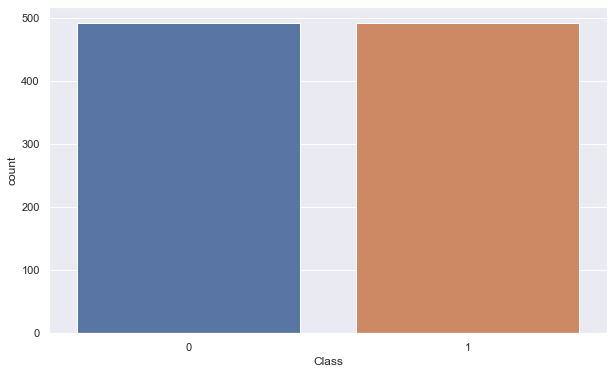

In [111]:
sns.countplot(x='Class', data=under_sample)

In [112]:
X = under_sample.loc[:, df.columns!='Class']
Y = under_sample.loc[:, df.columns=='Class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
clf = LogisticRegression().fit(X_train, Y_train)
Y_Test_Pred = clf.predict(X_test)

In [113]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.8984615384615384
Precision =  0.9337748344370861
Recall =  0.8597560975609756
F1 Score =  0.8952380952380953


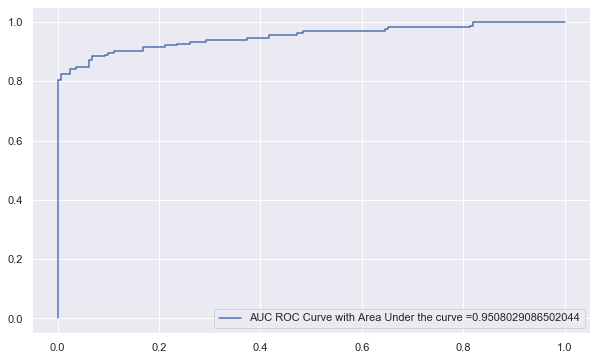

In [114]:
generate_auc_roc_curve(clf, X_test)